Loading packages

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import scipy.constants as const
import matplotlib.pyplot as plt

# Fluxonium

In [39]:
fluxonium_parameters= {
    'EJ':   10,
    'EC':   1.81,
    'EL':   0.369,
}

flux_array = np.linspace(-0.5, 0.5, 1001)

#Fluxonium definition
fluxonium = sq.Fluxonium(**fluxonium_parameters,flux =0,cutoff=40)

#Obtain energy levels and matrix elements
spectrum_data = fluxonium.get_matelements_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    evals_count=6
)

# Obtain the energy levels.
evals_matrix = spectrum_data.energy_table

#Obtain the transition energies from the state 0, 1 and 2
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

# Erasing 'transition from i to i'
transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)

#Obtain the matrix elements.
matrix_element = spectrum_data.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

# Erasing 'matrix element from i to i'
transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)

Spectral data:   0%|          | 0/1001 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

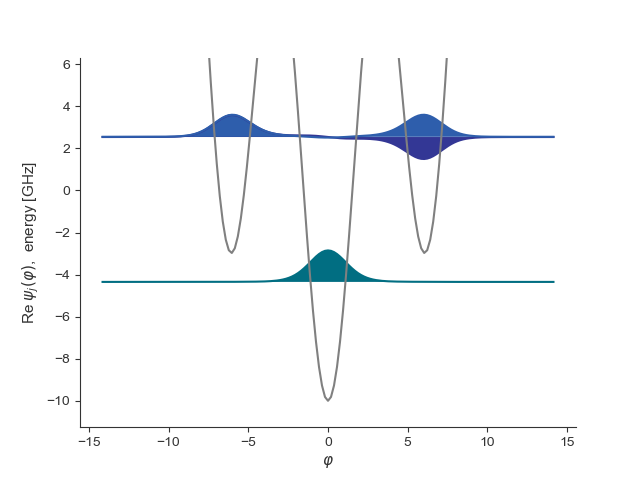

In [41]:
fluxonium.plot_wavefunction(which=[0,1,2])

## Plot energy transitions

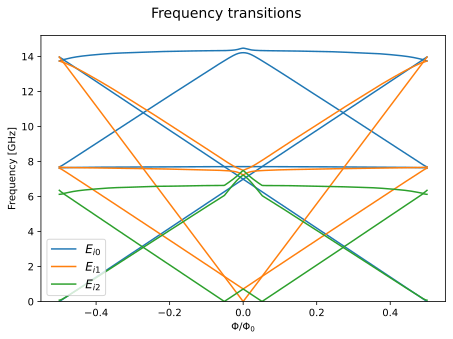

In [13]:
# %matplotlib widget #Uncomment this if you want to have a interactive image.

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency transitions', fontsize = 14)
ax.plot(flux_array,transitions0,color='C0')
ax.plot(flux_array,transitions1,color='C1')
ax.plot(flux_array,transitions2,color='C2')

ax.plot([], [], color='C0', label=r'$E_{i0}$')
ax.plot([], [], color='C1', label=r'$E_{i1}$')
ax.plot([], [], color='C2', label=r'$E_{i2}$')
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
ax.legend(fontsize = 12)
fig.tight_layout()
plt.show()

# Fluxonium + Resonator

In [45]:
fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.3678,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.137
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='discretized',
    truncated_dim= 10
)


flux1_array = np.linspace(-0.5,0.5,101)

spectrumData_fluxres = fluxonium_resonator.get_matelements_vs_paramvals(
    operator='θ2_operator',
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10)

spectra_fluxres = spectrumData_fluxres.energy_table

transitions0 = spectra_fluxres - spectra_fluxres[:,0].reshape(-1,1)
transitions1 = spectra_fluxres - spectra_fluxres[:,1].reshape(-1,1)
transitions2 = spectra_fluxres - spectra_fluxres[:,2].reshape(-1,1)

transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)


matrix_element = spectrumData_fluxres.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)


max0_matrix_elem = np.max(transition0_matrix_element)
max1_matrix_elem = np.max(transition1_matrix_element)
max2_matrix_elem = np.max(transition2_matrix_element)
max_val = max(max0_matrix_elem, max1_matrix_elem, max2_matrix_elem)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

## Plot energy levels

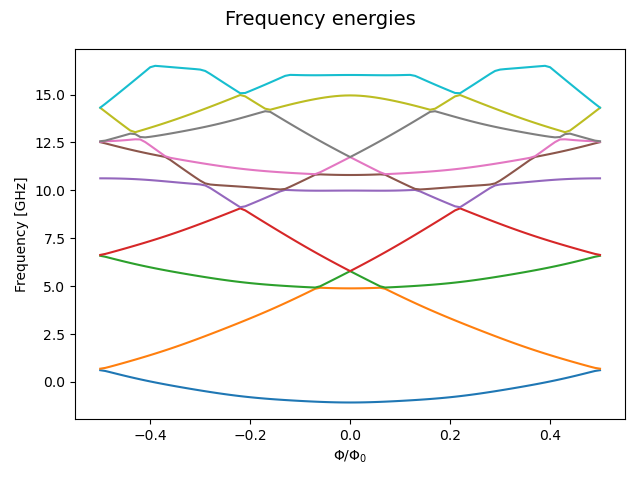

In [46]:
fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

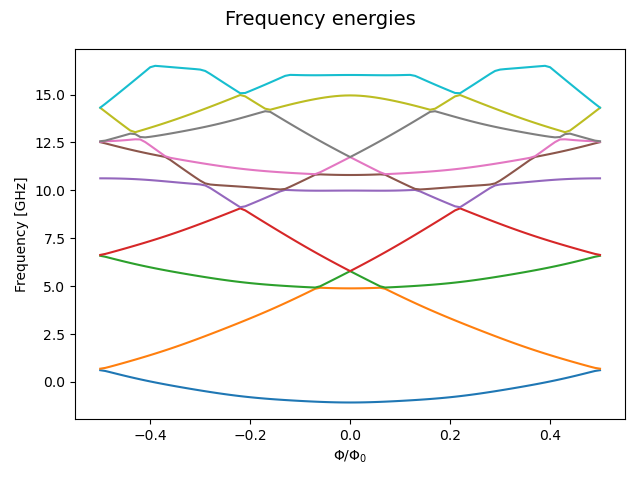

In [ ]:
fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

## Coupling

Spectral data:   0%|          | 0/51 [00:00<?, ?it/s]

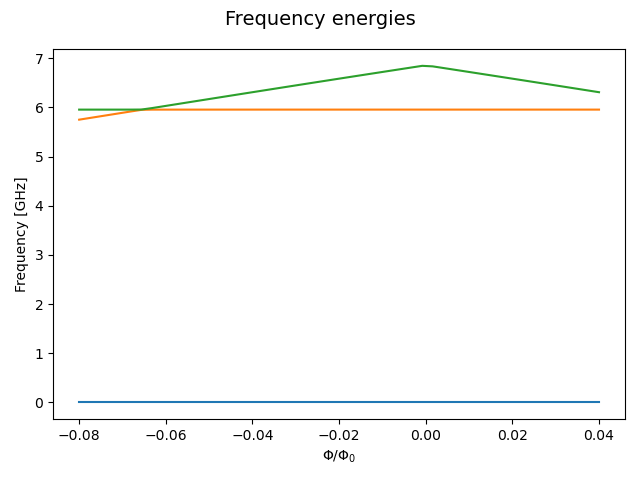

In [52]:
fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.3678,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.140
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

flux1_array = np.linspace(-0.08,0.04,51)

spectrumData_fluxres = fluxonium_resonator.get_spectrum_vs_paramvals(
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=3,
    subtract_ground=True)

spectra_fluxres = spectrumData_fluxres.energy_table


fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

In [53]:
spectra_fluxres.shape

(51, 3)

## Dispersive shift

In [20]:
flux1_array = np.linspace(-0.005,0.005,101)

spectrumData_fluxres = fluxonium_resonator.get_spectrum_vs_paramvals(
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

In [21]:
spectra_fluxres = spectrumData_fluxres.energy_table

Eg0_1 = spectra_fluxres[:,0]

Ee0_1 = spectra_fluxres[:,2]
Ef0_1 = spectra_fluxres[:,3]

Eg1_1 = spectra_fluxres[:,1]
Ee1_1 = spectra_fluxres[:,6]
Ef1_1 = spectra_fluxres[:,7]

Ee0_2 = spectra_fluxres[:,1]
Eg1_2 = spectra_fluxres[:,2]
Ee1_2 = spectra_fluxres[:,5]

dispersive_shift_01_1 = ((Ee1_1 - Ee0_1) - (Eg1_1 - Eg0_1))/2
dispersive_shift_01_2 = ((Ee1_2 - Ee0_2) - (Eg1_2 - Eg0_1))/2
dispersive_shift_02_1 = ((Ef1_1 - Ef0_1) - (Eg1_1 - Eg0_1))/2

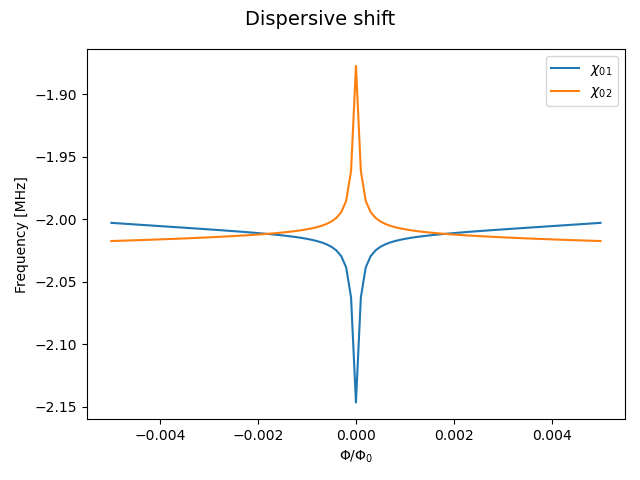

In [23]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)

ax.plot(flux1_array,dispersive_shift_01_1*1e3, label = r'$\chi_{01}$')
# ax.plot(flux1_array,dispersive_shift_01_2*1e3, label = r'$\chi_{01}$')
ax.plot(flux1_array,dispersive_shift_02_1*1e3, label = r'$\chi_{02}$')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
ax.legend()
fig.tight_layout()
plt.show()

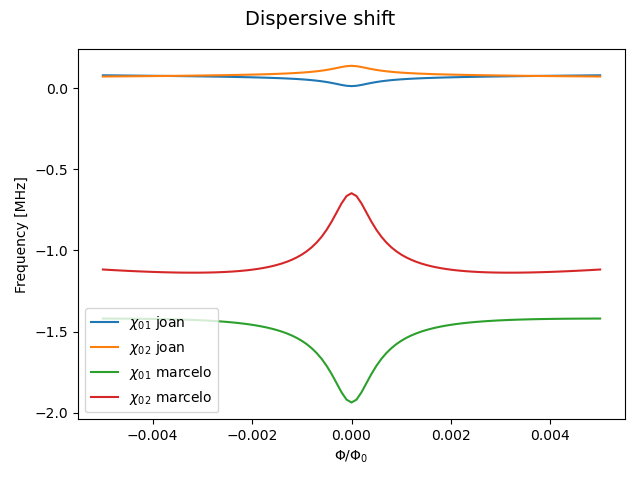

In [ ]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)
ax.plot(flux1_array,dispersive_shift_01_1_joan*1e3, label = r'$\chi_{01}$ joan')
# ax.plot(flux1_array,dispersive_shift_01_2_joan*1e3, label = r'$\chi_{01}$ joan')
ax.plot(flux1_array,dispersive_shift_02_1_joan*1e3, label = r'$\chi_{02}$ joan')

ax.plot(flux1_array,dispersive_shift_01_1_marcelo*1e3, label = r'$\chi_{01}$ marcelo')
# ax.plot(flux1_array,dispersive_shift_01_2_marcelo*1e3, label = r'$\chi_{01}$ marcelo')
ax.plot(flux1_array,dispersive_shift_02_1_marcelo*1e3, label = r'$\chi_{02}$ marcelo')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
ax.legend()
fig.tight_layout()
plt.show()

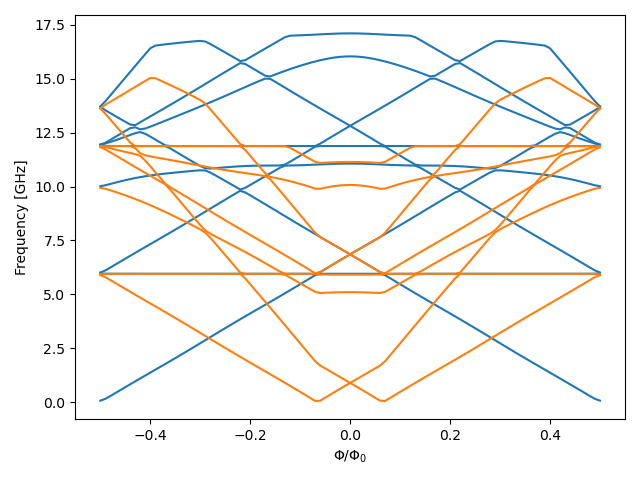

In [12]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
ax.plot(flux1_array,transitions0, color='C0')
ax.plot(flux1_array,transitions1, color='C1')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

# Fluxonium-resonator fitting

In [ ]:
fluxonium_parameters= {
    'EJ':   10.013,
    'EC':   1.588,
    'EL':   0.3678,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.137
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

fluxonium_resonator = sq.Circuit(
    input_string=flux_res_dict,
    from_file=None,
    ext_basis='discretized',
    truncated_dim= 10
)

In [66]:
import sys
sys.path.append('..')
import pandas as pd
from tqdm.notebook import tqdm
from IPython.utils import io
from scipy.optimize import differential_evolution

In [73]:
file_path = '../data/data_fitting/reso1.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',', header=None, names=['phi', 'reso1'])

def minimizer_fluxres(params):
    Ej,Ec,El,EC_resonator = params
    Ej = Ej*10; El = El/10; EC_resonator = EC_resonator*10
    flux_res_dict = f"""
    branches:
    - ["JJ", 0,1, {Ej}, {Ec}]
    - ["L", 1,2, {El*134/(134-14)}]
    # Coupling inductance
    - ["L", 2,0, {El*134/14}]
    # JJA resonator
    - ["C", 0,3, {El*134/(152+14)}]
    - ["L", 3,2, {EC_resonator}]
    """

    fluxonium_resonator = sq.Circuit(
        input_string=flux_res_dict,
        from_file=None,
        ext_basis='discretized',
        truncated_dim= 10
    )
    with io.capture_output() as captured:
        spectrumData_fluxres = fluxonium_resonator.get_spectrum_vs_paramvals(
            param_name='Φ1',
            param_vals=df['phi'].values,
            evals_count=2)

    spectra_fluxres = spectrumData_fluxres.energy_table
    cost = np.sqrt(np.sum((spectra_fluxres[:,1] - df['reso1'].values)**2))/len(df['phi'].values)
    
    print(cost)

    return cost

progress = []

# Create the progress bar
progress_bar = tqdm(total=100, desc="Iterations")

def callback(params, convergence):
    # Register the current state of the fit
    progress.append(params)
    # Calculate the current cost
    cost = minimizer_fluxres(params)
    
    # Print the parameters, cost, and convergence
    print(f'Params: {params}, Cost: {cost}, Convergence: {convergence}')
    # Update the progress bar
    progress_bar.update(len(progress) - progress_bar.n)
    if len(progress) >= 100:
        progress_bar.close()

bounds = [(0.8, 1.1), (1.2, 2), (2,4), (1,2)]

result = differential_evolution(func=minimizer_fluxres, bounds=bounds, callback=callback, disp=False, maxiter=100)

Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

1.9283220439500237
2.1542293286245844
2.003782924883669
1.967678337799222
2.416842124238265
2.125320124616651
1.7859412179582614
1.5713490548599065
1.633324654844266
1.6847022613617881
2.257572156636002
1.9879881955111358
2.2112991588707436
2.1267960808919537
2.4417878853229946
2.1126130149565765
2.364696315811658
1.8984993811012345
2.4164366829609816
2.321635054453348
1.7057472609952964
1.9398007365097896
1.958126965410858
2.606644995856928
2.5272841105252235
2.3991967982448026
1.979058603723419
2.2098256219200203
2.1056463108308408
2.6105902280827546
2.0955267278086565
1.9249538829185964
1.7008903719650816
1.892245144741577
2.1898509397198715
2.3038296964911016
2.082799732441253
2.341104598324981
2.371100974832675
1.9964837702980691
2.2032761339847196
2.0936379621382843
2.020879436829276
2.2748303708272974
1.6535884210628309
1.8068973820708982
2.481546489130015
2.057126612031214
2.4170664875877055
2.7140744584612566
1.977726172243712
2.456254219697326
1.7016224865830638
1.68951800083